# Marketing Campaign Project - Main

Problem Objective:

As a data scientist, you must conduct exploratory data analysis and hypothesis testing to enhance your comprehension of the diverse factors influencing customer acquisition.

## 1. Import Libraries and Data to Examine

In [1]:
# import relevant libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt

In [2]:
# import the data file and save it in a pandas dataframe as 'df'
df = pd.read_csv('marketing_data.csv')

In [3]:
# making sure the data loaded correctly and is accurate
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,"$84,835.00",0,0,6/16/14,0,189,...,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,"$57,091.00",0,0,6/15/14,0,464,...,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,"$67,267.00",0,1,5/13/14,0,134,...,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,"$32,474.00",1,1,5/11/14,0,10,...,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,"$21,474.00",1,0,4/8/14,0,6,...,2,7,1,0,0,0,0,1,0,SP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10142,1976,PhD,Divorced,"$66,476.00",0,1,3/7/13,99,372,...,11,4,0,0,0,0,0,0,0,US
2236,5263,1977,2n Cycle,Married,"$31,056.00",1,0,1/22/13,99,5,...,3,8,0,0,0,0,0,0,0,SP
2237,22,1976,Graduation,Divorced,"$46,310.00",1,0,12/3/12,99,185,...,5,8,0,0,0,0,0,0,0,SP
2238,528,1978,Graduation,Married,"$65,819.00",0,0,11/29/12,99,267,...,10,3,0,0,0,0,0,0,0,IND


In [4]:
# Remove spaces from column names, like " Income "
df.columns = [col.replace(' ', '') for col in df.columns]

# Verify the change
print(df.columns)

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Response', 'Complain', 'Country'],
      dtype='object')


## 2. Conduct Missing Value Imputation & Data Cleansing

In [5]:
# finding the unique values in 'Education' and their count to see if anything needs to be cleaned
unique_ed_values = df['Education'].unique()
print(unique_ed_values)

ed_value_counts = df['Education'].value_counts()
print(ed_value_counts)

['Graduation' 'PhD' '2n Cycle' 'Master' 'Basic']
Education
Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: count, dtype: int64


In [6]:
# finding the unique values in 'Marital_Status' and their count to see if anything needs to be cleaned
unique_marital_values = df['Marital_Status'].unique()
print(unique_marital_values)

marital_value_counts = df['Marital_Status'].value_counts()
print(marital_value_counts)

['Divorced' 'Single' 'Married' 'Together' 'Widow' 'YOLO' 'Alone' 'Absurd']
Marital_Status
Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
YOLO          2
Absurd        2
Name: count, dtype: int64


In [7]:
# we have three categories that are outliers and don't make much sense, so we need to clean them up and group them
# with an existing category. I will group them into the 'Single' category.

to_replace = ['YOLO', 'Alone', 'Absurd']
df['Marital_Status'] = df['Marital_Status'].replace(to_replace, 'Single')

In [8]:
# checking to make sure the values were added to 'Single'

marital_value_counts_updated = df['Marital_Status'].value_counts()
print(marital_value_counts_updated)

Marital_Status
Married     864
Together    580
Single      487
Divorced    232
Widow        77
Name: count, dtype: int64


In [9]:
# checking how many null values exist in 'Income'

income_null_count = df['Income'].isnull().sum()
print(f"Number of null values in 'Income': {income_null_count}")

Number of null values in 'Income': 24


In [10]:
# Need to clean and standardize 'Income'
# Remove dollar signs and commas, then convert to numeric

df['Income'] = df['Income'].str.replace('$', '').str.replace(',', '').astype(float)

In [11]:
# This should now show 'float64' or 'int64'
print(df['Income'].dtypes)  

# checking to make sure Income is updated with the clean data type
df.head()

float64


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,84835.0,0,0,6/16/14,0,189,...,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,57091.0,0,0,6/15/14,0,464,...,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,67267.0,0,1,5/13/14,0,134,...,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,32474.0,1,1,5/11/14,0,10,...,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,21474.0,1,0,4/8/14,0,6,...,2,7,1,0,0,0,0,1,0,SP


In [12]:
# finding the mean income of people based on their marital status and education, and 
# grouping these together so I can fill in missing income values with an average income value, based on 
# that null value's marital status and education

mean_income_by_group = df.groupby(['Marital_Status', 'Education'])['Income'].transform('mean')
mean_income_by_group

0       54526.042017
1       51365.633065
2       50800.258741
3       55758.480702
4       51365.633065
            ...     
2235    53096.615385
2236    46201.100000
2237    54526.042017
2238    50800.258741
2239    58138.031579
Name: Income, Length: 2240, dtype: float64

In [13]:
# filling in the missing income values with the average based on marital status and education

df['Income'] = df['Income'].fillna(mean_income_by_group)

In [14]:
# checking to make sure the above function worked correctly and there are no more null values

income_null_count = df['Income'].isnull().sum()
print(f"Number of null values in 'Income': {income_null_count}")

Number of null values in 'Income': 0


## 3. Create Variables to Represent Total Childen, Age, and Total Spending

In [15]:
# create a variable for the total number of children (Kids & Teens)
# first I add the total children from each row and put the sum into a new column, 'Total_Children'

df['Total_Children'] = df['Kidhome'] + df['Teenhome']

In [16]:
# checking to make sure the new column was correctly added
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,Total_Children
0,1826,1970,Graduation,Divorced,84835.0,0,0,6/16/14,0,189,...,1,0,0,0,0,0,1,0,SP,0
1,1,1961,Graduation,Single,57091.0,0,0,6/15/14,0,464,...,5,0,0,0,0,1,1,0,CA,0
2,10476,1958,Graduation,Married,67267.0,0,1,5/13/14,0,134,...,2,0,0,0,0,0,0,0,US,1
3,1386,1967,Graduation,Together,32474.0,1,1,5/11/14,0,10,...,7,0,0,0,0,0,0,0,AUS,2
4,5371,1989,Graduation,Single,21474.0,1,0,4/8/14,0,6,...,7,1,0,0,0,0,1,0,SP,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10142,1976,PhD,Divorced,66476.0,0,1,3/7/13,99,372,...,4,0,0,0,0,0,0,0,US,1
2236,5263,1977,2n Cycle,Married,31056.0,1,0,1/22/13,99,5,...,8,0,0,0,0,0,0,0,SP,1
2237,22,1976,Graduation,Divorced,46310.0,1,0,12/3/12,99,185,...,8,0,0,0,0,0,0,0,SP,1
2238,528,1978,Graduation,Married,65819.0,0,0,11/29/12,99,267,...,3,0,0,0,0,0,0,0,IND,0


In [17]:
# now I create the variable to sum the total number of children and store it in one place
# might not even be necessary to have this variable, but I wanted it created just in case
total_kids_and_teens = df['Kidhome'].sum() + df['Teenhome'].sum()
print(f"Total number of kids and teens: {total_kids_and_teens}")

Total number of kids and teens: 2129


In [18]:
# create a column that stores each customer's age based on today's year minus their birth year

current_year = dt.datetime.now().year
df['Age'] = current_year - df['Year_Birth']

In [19]:
# checking to make sure the new column was correctly added
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,Total_Children,Age
0,1826,1970,Graduation,Divorced,84835.0,0,0,6/16/14,0,189,...,0,0,0,0,0,1,0,SP,0,54
1,1,1961,Graduation,Single,57091.0,0,0,6/15/14,0,464,...,0,0,0,0,1,1,0,CA,0,63
2,10476,1958,Graduation,Married,67267.0,0,1,5/13/14,0,134,...,0,0,0,0,0,0,0,US,1,66
3,1386,1967,Graduation,Together,32474.0,1,1,5/11/14,0,10,...,0,0,0,0,0,0,0,AUS,2,57
4,5371,1989,Graduation,Single,21474.0,1,0,4/8/14,0,6,...,1,0,0,0,0,1,0,SP,1,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10142,1976,PhD,Divorced,66476.0,0,1,3/7/13,99,372,...,0,0,0,0,0,0,0,US,1,48
2236,5263,1977,2n Cycle,Married,31056.0,1,0,1/22/13,99,5,...,0,0,0,0,0,0,0,SP,1,47
2237,22,1976,Graduation,Divorced,46310.0,1,0,12/3/12,99,185,...,0,0,0,0,0,0,0,SP,1,48
2238,528,1978,Graduation,Married,65819.0,0,0,11/29/12,99,267,...,0,0,0,0,0,0,0,IND,0,46


In [20]:
# creating a column that accounts for a customer's total amount of money spent across the different products

spending_columns = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
df['Total_Spending'] = df[spending_columns].sum(axis=1)
df # checking to make sure the new column was added correctly

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,Total_Children,Age,Total_Spending
0,1826,1970,Graduation,Divorced,84835.0,0,0,6/16/14,0,189,...,0,0,0,0,1,0,SP,0,54,1190
1,1,1961,Graduation,Single,57091.0,0,0,6/15/14,0,464,...,0,0,0,1,1,0,CA,0,63,577
2,10476,1958,Graduation,Married,67267.0,0,1,5/13/14,0,134,...,0,0,0,0,0,0,US,1,66,251
3,1386,1967,Graduation,Together,32474.0,1,1,5/11/14,0,10,...,0,0,0,0,0,0,AUS,2,57,11
4,5371,1989,Graduation,Single,21474.0,1,0,4/8/14,0,6,...,0,0,0,0,1,0,SP,1,35,91
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10142,1976,PhD,Divorced,66476.0,0,1,3/7/13,99,372,...,0,0,0,0,0,0,US,1,48,689
2236,5263,1977,2n Cycle,Married,31056.0,1,0,1/22/13,99,5,...,0,0,0,0,0,0,SP,1,47,55
2237,22,1976,Graduation,Divorced,46310.0,1,0,12/3/12,99,185,...,0,0,0,0,0,0,SP,1,48,309
2238,528,1978,Graduation,Married,65819.0,0,0,11/29/12,99,267,...,0,0,0,0,0,0,IND,0,46,1383


In [21]:
# creating a new column that stores the total number of a customer's transactions across the three sales channels

df['Total_Transactions'] = df['NumWebPurchases'] + df['NumCatalogPurchases'] + df['NumStorePurchases']
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,Total_Children,Age,Total_Spending,Total_Transactions
0,1826,1970,Graduation,Divorced,84835.0,0,0,6/16/14,0,189,...,0,0,0,1,0,SP,0,54,1190,14
1,1,1961,Graduation,Single,57091.0,0,0,6/15/14,0,464,...,0,0,1,1,0,CA,0,63,577,17
2,10476,1958,Graduation,Married,67267.0,0,1,5/13/14,0,134,...,0,0,0,0,0,US,1,66,251,10
3,1386,1967,Graduation,Together,32474.0,1,1,5/11/14,0,10,...,0,0,0,0,0,AUS,2,57,11,3
4,5371,1989,Graduation,Single,21474.0,1,0,4/8/14,0,6,...,0,0,0,1,0,SP,1,35,91,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10142,1976,PhD,Divorced,66476.0,0,1,3/7/13,99,372,...,0,0,0,0,0,US,1,48,689,18
2236,5263,1977,2n Cycle,Married,31056.0,1,0,1/22/13,99,5,...,0,0,0,0,0,SP,1,47,55,4
2237,22,1976,Graduation,Divorced,46310.0,1,0,12/3/12,99,185,...,0,0,0,0,0,SP,1,48,309,12
2238,528,1978,Graduation,Married,65819.0,0,0,11/29/12,99,267,...,0,0,0,0,0,IND,0,46,1383,19


## 4. Outlier Identification and Treatment

Here we are looking at outliers in the important columns of data that might be skewing the data so we can better analyze the distributions and make future predictions with our data

In [22]:
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Total_Children,Age,Total_Spending,Total_Transactions
count,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,5592.159821,1968.805804,52248.619720,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,0.074554,0.072768,0.064286,0.013393,0.149107,0.009375,0.950446,55.194196,605.798214,12.537054
std,3246.662198,11.984069,25039.967739,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,0.262728,0.259813,0.245316,0.114976,0.356274,0.096391,0.751803,11.984069,602.249288,7.205741
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,28.000000,5.000000,0.000000
25%,2828.250000,1959.000000,35538.750000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,47.000000,68.750000,6.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,54.000000,396.000000,12.000000
75%,8427.750000,1977.000000,68289.750000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,65.000000,1045.500000,18.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,131.000000,2525.000000,32.000000


<Axes: >

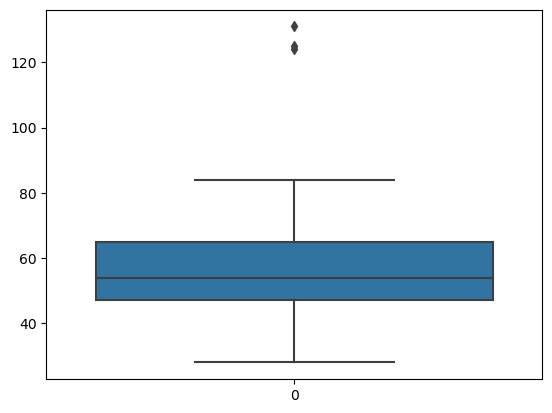

In [23]:
# here I am beginning to look for outliers in our data to eliminate. I start with the Age column
sns.boxplot(df['Age'])

In [24]:
# clearly we have some outliers on the high end so I will set the upper age limit

upper_age_limit = df['Age'].quantile(0.99)

In [25]:
# remove the outliers in the Age column

df['Age'] = np.where(df['Age'] > upper_age_limit, upper_age_limit, df['Age'])

<Axes: >

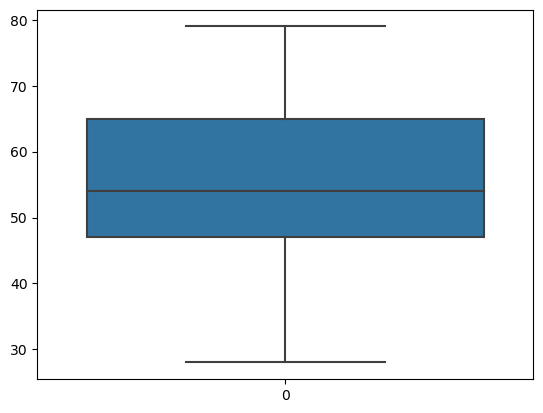

In [26]:
# checking to make sure the outliers were removed
sns.boxplot(df['Age'])

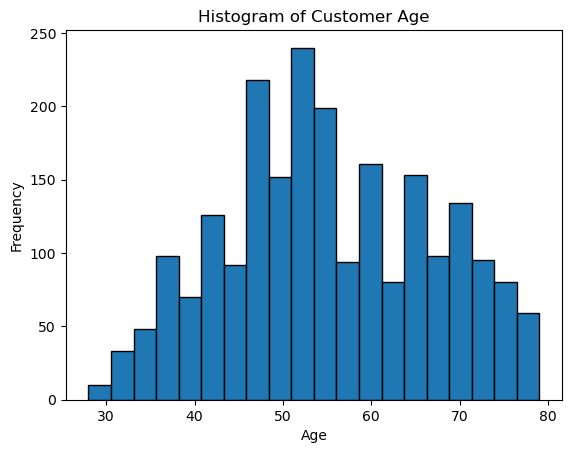

In [27]:
# also wanting to see how the cleaned Age data looks in a histogram

plt.hist(df['Age'], bins=20, edgecolor='black')
plt.title('Histogram of Customer Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

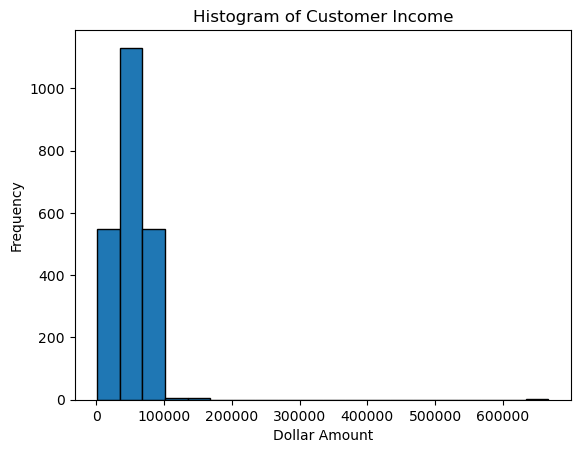

In [28]:
# checking the 'Income' data with a histogram to see if any outliers exist

plt.hist(df['Income'], bins=20, edgecolor='black')
plt.title('Histogram of Customer Income')
plt.xlabel('Dollar Amount')
plt.ylabel('Frequency')
plt.show()

In [29]:
# clearly we have some extremely high outliers, so I'll set the upper income limit
upper_income_limit = df['Income'].quantile(0.99)

# then I remove the outliers in the Income column
df['Income'] = np.where(df['Income'] > upper_income_limit, upper_income_limit, df['Income'])

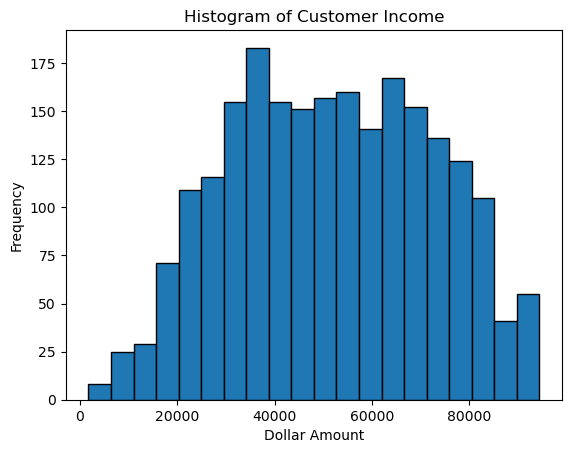

In [30]:
# checking the updated histogram to make sure the outliers were removed
plt.hist(df['Income'], bins=20, edgecolor='black')
plt.title('Histogram of Customer Income')
plt.xlabel('Dollar Amount')
plt.ylabel('Frequency')
plt.show()

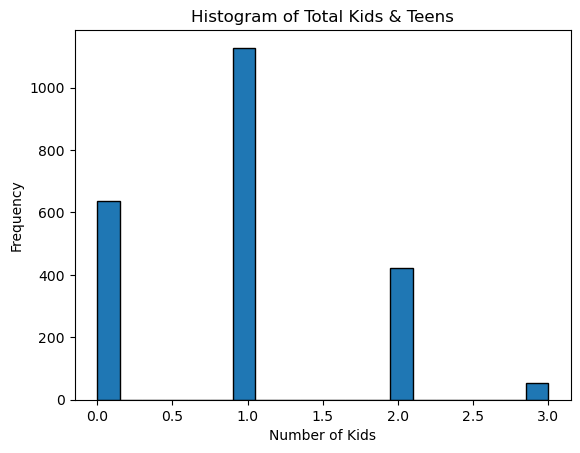

In [32]:
# examing the total number of children for outliers.

plt.hist(df['Total_Children'], bins=20, edgecolor='black')
plt.title('Histogram of Total Kids & Teens')
plt.xlabel('Number of Kids')
plt.ylabel('Frequency')
plt.show()

# It appears to be clean so no outlier treatment is needed

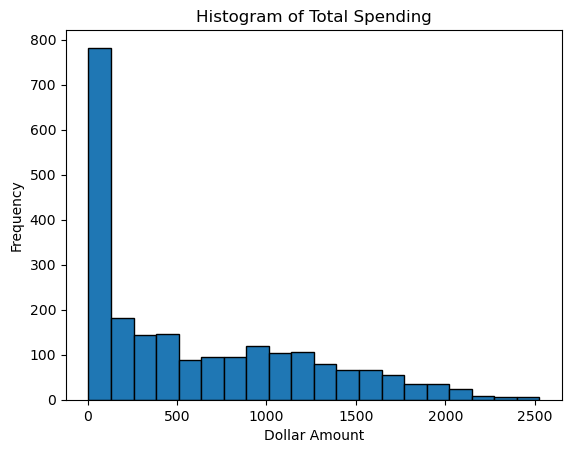

In [33]:
# examining Total Spending to see if outlier treatment is needed

plt.hist(df['Total_Spending'], bins=20, edgecolor='black')
plt.title('Histogram of Total Spending')
plt.xlabel('Dollar Amount')
plt.ylabel('Frequency')
plt.show()

In [34]:
# I went back and forth here whether or not outlier treatment was needed, but since it appears only a select few 
# values are above ~2000, I decided outlier treatment would be beneficial so I set the upper spending limit
upper_spending_limit = df['Total_Spending'].quantile(0.99)

# remove the outliers in the Total Spending column
df['Total_Spending'] = np.where(df['Total_Spending'] > upper_spending_limit, upper_spending_limit, df['Total_Spending'])

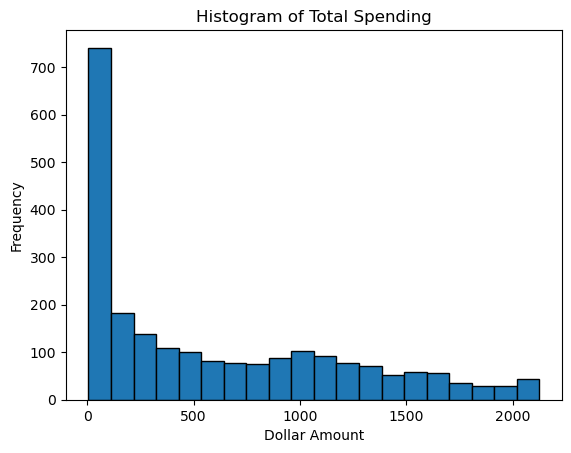

In [35]:
# checking the updated histogram to make sure outliers are removed from Total Spending

plt.hist(df['Total_Spending'], bins=20, edgecolor='black')
plt.title('Histogram of Total Spending')
plt.xlabel('Dollar Amount')
plt.ylabel('Frequency')
plt.show()

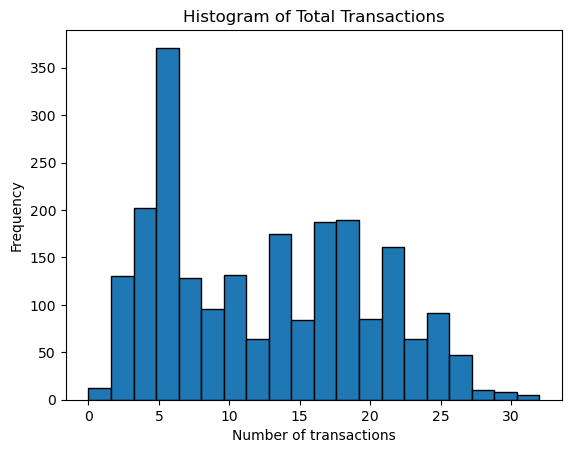

In [36]:
# examining Total Transactions to see if outlier treatment is needed
# I didn't feel like the higher values were that big of outliers so I decided no outlier treatment is needed

plt.hist(df['Total_Transactions'], bins=20, edgecolor='black')
plt.title('Histogram of Total Transactions')
plt.xlabel('Number of transactions')
plt.ylabel('Frequency')
plt.show()

## 5. Ordinal & One-Hot Encoding

In [37]:
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder

Ordinal Variables
- Education (Basic > 2n Cycle > Graduation > Master > PhD)

Nominal Variables for One-Hot
- Marital Status (Married, Together, Single, Divorced, Widow)
- Country

In [38]:
# applying ordinal encoding to Education

education_order = ['Basic', '2n Cycle', 'Graduation', 'Master', 'PhD']

df['Education'] = df['Education'].astype(pd.CategoricalDtype(categories=education_order, ordered=True)).cat.codes

In [39]:
# making sure it worked 
df['Education']

0       2
1       2
2       2
3       2
4       2
       ..
2235    4
2236    1
2237    2
2238    2
2239    4
Name: Education, Length: 2240, dtype: int8

In [40]:
# applying one-hot encoding for Marital Status and Country

df = pd.get_dummies(df, columns=['Marital_Status', 'Country'])
df

,ID,Year_Birth,Education,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,Marital_Status_Together,Marital_Status_Widow,Country_AUS,Country_CA,Country_GER,Country_IND,Country_ME,Country_SA,Country_SP,Country_US
0,1826,1970,2,84835.00,0,0,6/16/14,0,189,104,...,False,False,False,False,False,False,False,False,True,False
1,1,1961,2,57091.00,0,0,6/15/14,0,464,5,...,False,False,False,True,False,False,False,False,False,False
2,10476,1958,2,67267.00,0,1,5/13/14,0,134,11,...,False,False,False,False,False,False,False,False,False,True
3,1386,1967,2,32474.00,1,1,5/11/14,0,10,0,...,True,False,True,False,False,False,False,False,False,False
4,5371,1989,2,21474.00,1,0,4/8/14,0,6,16,...,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10142,1976,4,66476.00,0,1,3/7/13,99,372,18,...,False,False,False,False,False,False,False,False,False,True
2236,5263,1977,1,31056.00,1,0,1/22/13,99,5,10,...,False,False,False,False,False,False,False,False,True,False
2237,22,1976,2,46310.00,1,0,12/3/12,99,185,2,...,False,False,False,False,False,False,False,False,True,False
2238,528,1978,2,65819.00,0,0,11/29/12,99,267,38,...,False,False,False,False,False,True,False,False,False,False


## 6. Generate Heatmap

In [48]:
# I was getting errors with the data type for 'Dt_Customer' so the next few lines are to convert the data type
print(df['Dt_Customer'].dtype)


datetime64[ns]


In [42]:
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format='%m-%d-%y', errors='coerce')


In [43]:
print(df['Dt_Customer'].dtype)

datetime64[ns]


In [44]:
df

,ID,Year_Birth,Education,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,Marital_Status_Together,Marital_Status_Widow,Country_AUS,Country_CA,Country_GER,Country_IND,Country_ME,Country_SA,Country_SP,Country_US
0,1826,1970,2,84835.00,0,0,NaT,0,189,104,...,False,False,False,False,False,False,False,False,True,False
1,1,1961,2,57091.00,0,0,NaT,0,464,5,...,False,False,False,True,False,False,False,False,False,False
2,10476,1958,2,67267.00,0,1,NaT,0,134,11,...,False,False,False,False,False,False,False,False,False,True
3,1386,1967,2,32474.00,1,1,NaT,0,10,0,...,True,False,True,False,False,False,False,False,False,False
4,5371,1989,2,21474.00,1,0,NaT,0,6,16,...,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10142,1976,4,66476.00,0,1,NaT,99,372,18,...,False,False,False,False,False,False,False,False,False,True
2236,5263,1977,1,31056.00,1,0,NaT,99,5,10,...,False,False,False,False,False,False,False,False,True,False
2237,22,1976,2,46310.00,1,0,NaT,99,185,2,...,False,False,False,False,False,False,False,False,True,False
2238,528,1978,2,65819.00,0,0,NaT,99,267,38,...,False,False,False,False,False,True,False,False,False,False


In [45]:
nat_count = df['Dt_Customer'].isna().sum()
print(f"Number of NaT values in 'Dt_Customer': {nat_count}")


Number of NaT values in 'Dt_Customer': 2240


In [46]:
#calculating the correlation matrix
corr_matrix = df.corr()

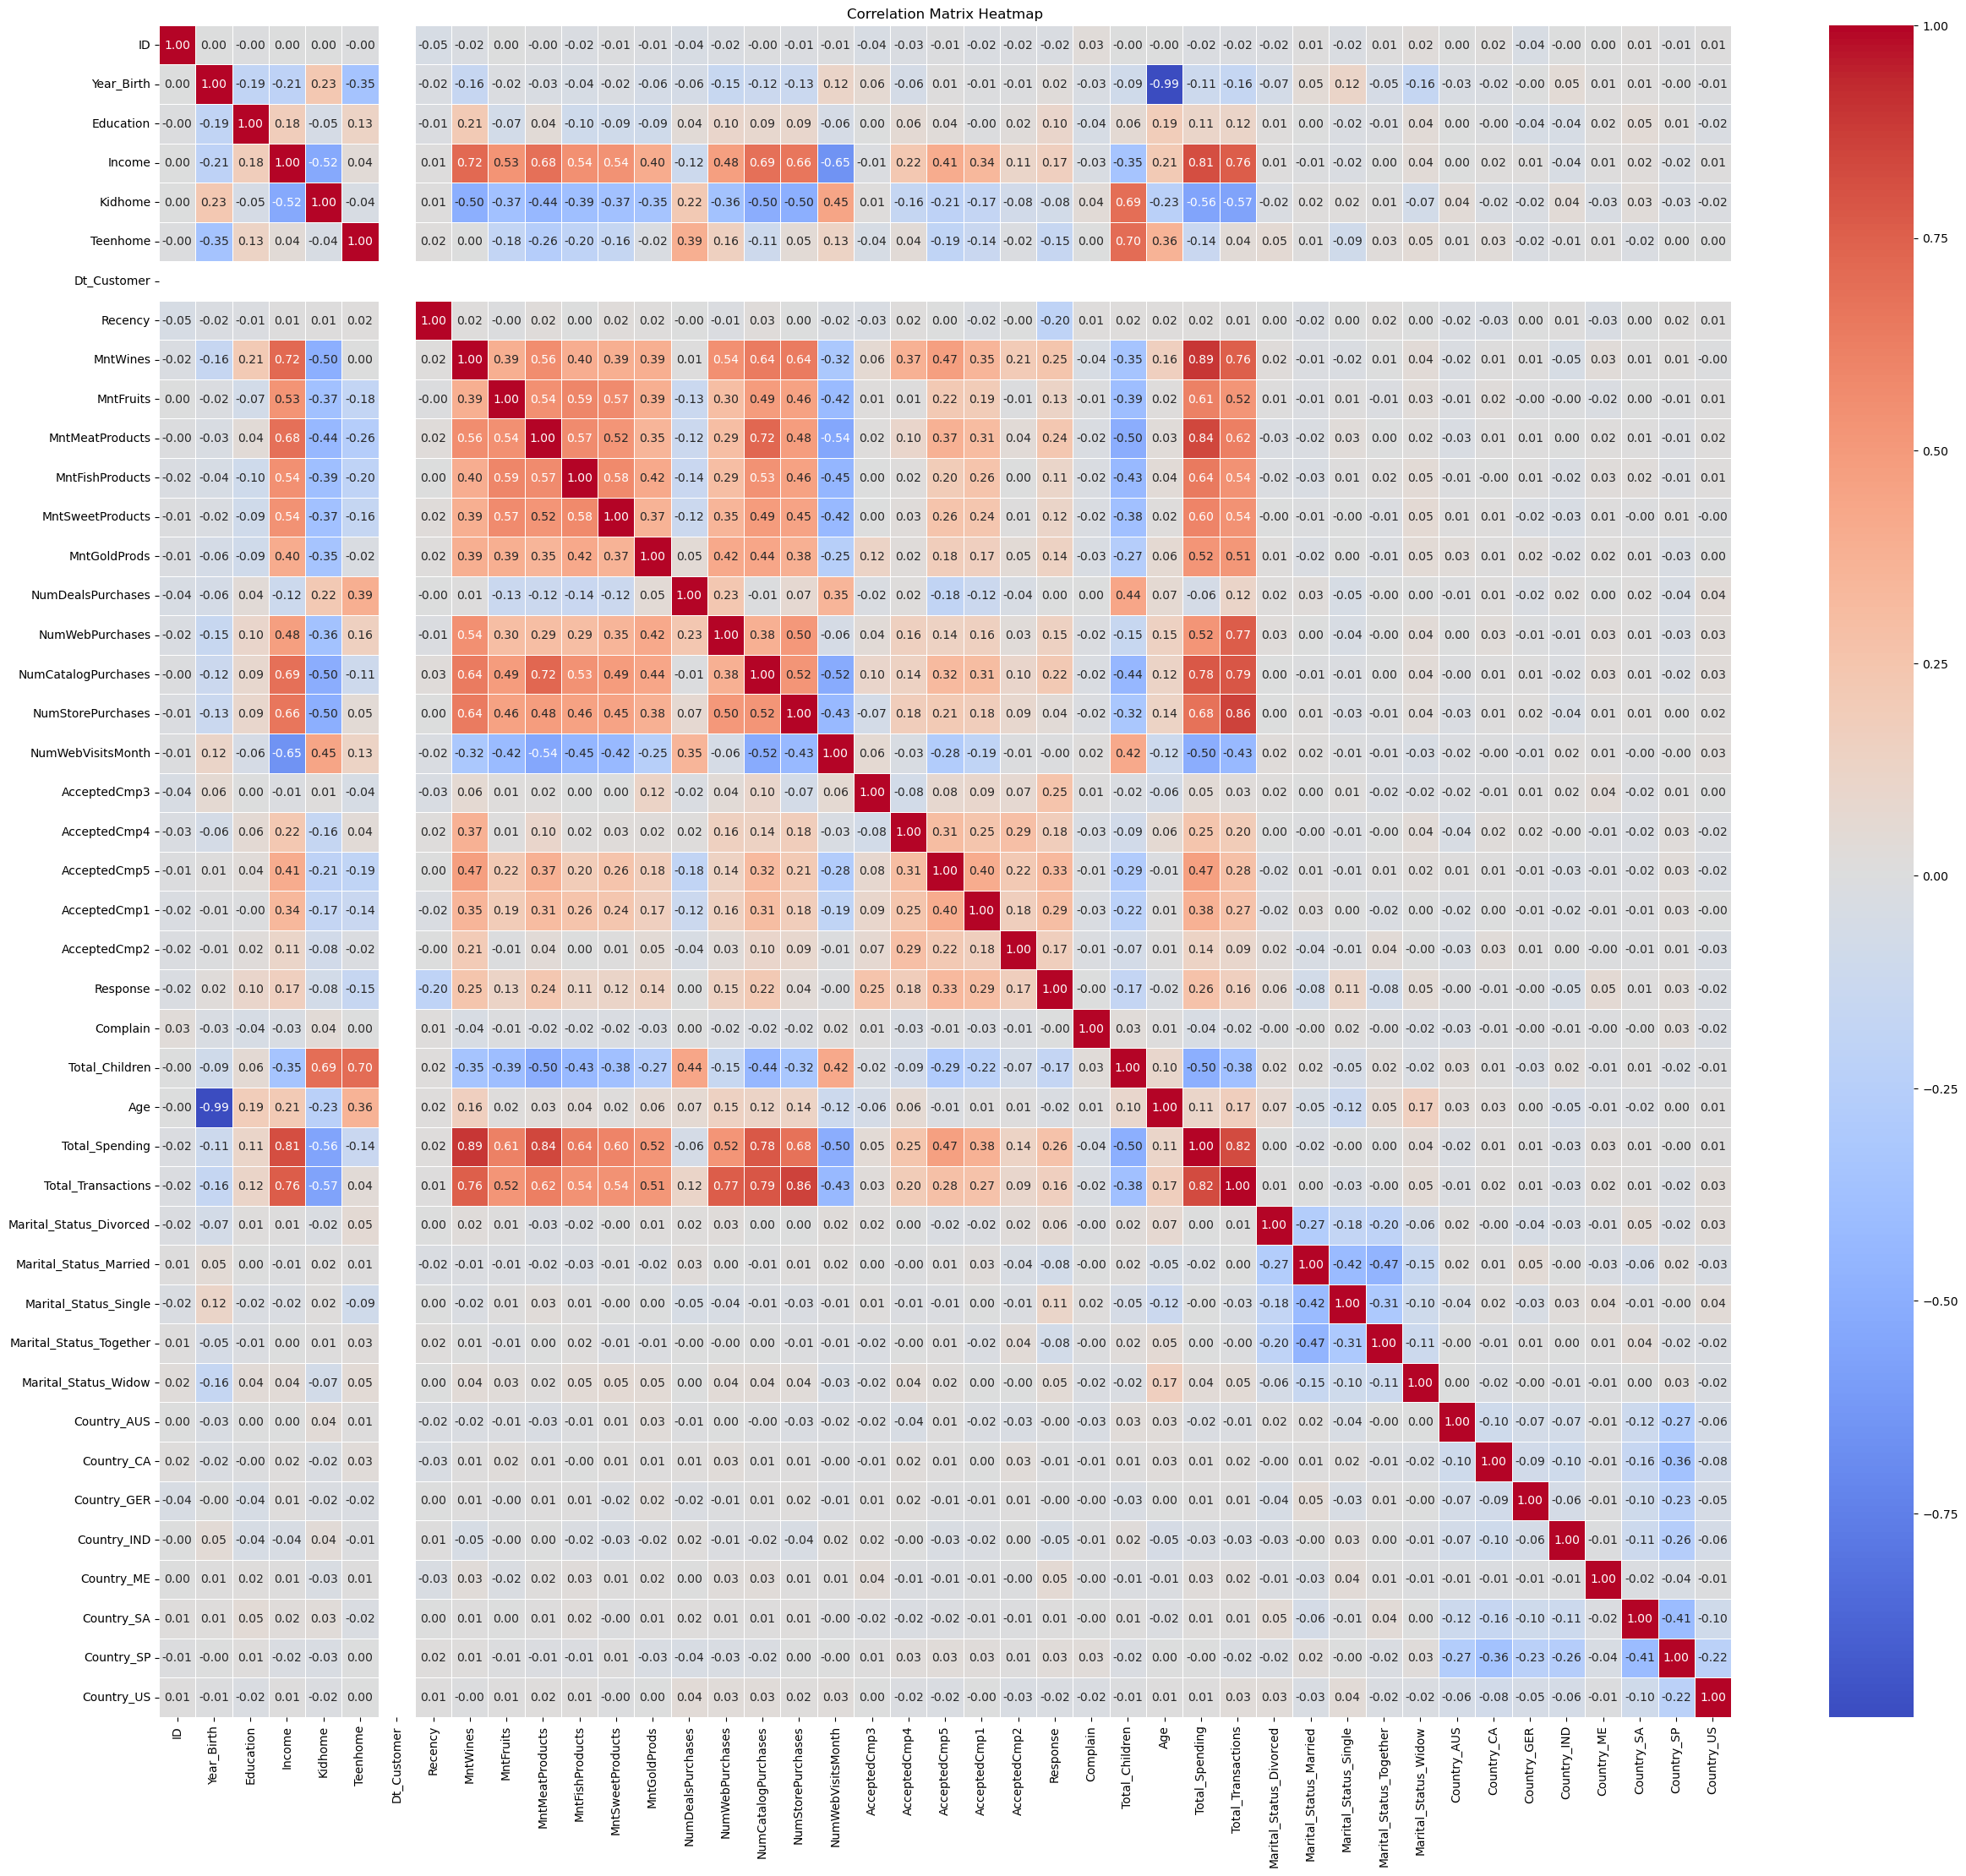

In [47]:
plt.figure(figsize=(30, 26))  
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True, linewidths=0.5)
plt.title('Correlation Matrix Heatmap')  
plt.show()

## 7. Test Different Hypotheses on the Dataset Correlations

a) Older individuals may not possess the same level of technological proficiency and may, therefore, lean toward traditional in-store shopping preferences.

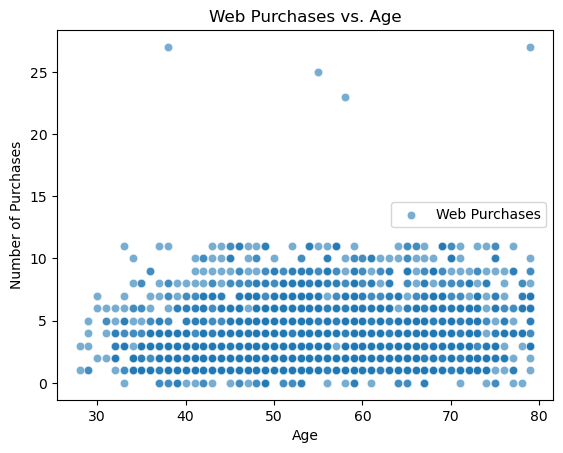

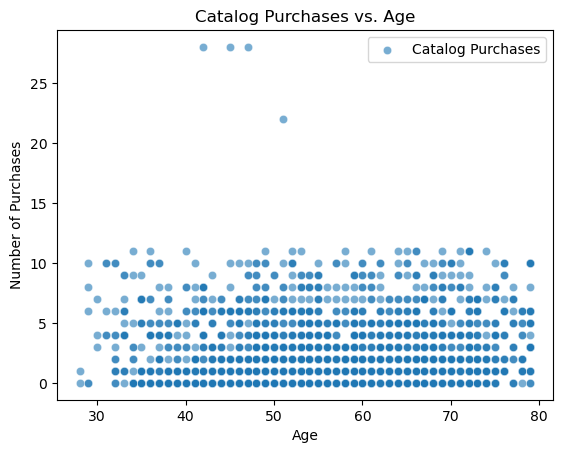

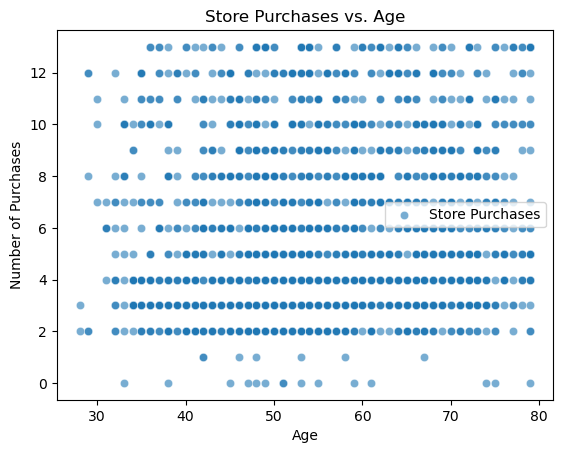

In [51]:
# First I wanted to see a visual representation of they hypotheses.

# Scatter plot for Web Purchases vs. Age
sns.scatterplot(x='Age', y='NumWebPurchases', data=df, label='Web Purchases', alpha=0.6)
plt.xlabel('Age')
plt.ylabel('Number of Purchases')
plt.title('Web Purchases vs. Age')
plt.show()

# Scatter plot for Catalog Purchases vs. Age
sns.scatterplot(x='Age', y='NumCatalogPurchases', data=df, label='Catalog Purchases', alpha=0.6)
plt.xlabel('Age')
plt.ylabel('Number of Purchases')
plt.title('Catalog Purchases vs. Age')
plt.show()

# Scatter plot for Store Purchases vs. Age
sns.scatterplot(x='Age', y='NumStorePurchases', data=df, label='Store Purchases', alpha=0.6)
plt.xlabel('Age')
plt.ylabel('Number of Purchases')
plt.title('Store Purchases vs. Age')
plt.show()

In [120]:
# The scatter plots honestly did not help much since there are so many data points, so
# I used Pearson's Correlation to see a numeric P-value to better determine the correlation

from scipy.stats import pearsonr

# Web Purchases
corr_web, p_value_web = pearsonr(df['Age'], df['NumWebPurchases'])
print(f"Pearson's correlation (Web Purchases): {corr_web}, P-value: {p_value_web}")

# Catalog Purchases
corr_catalog, p_value_catalog = pearsonr(df['Age'], df['NumCatalogPurchases'])
print(f"Pearson's correlation (Catalog Purchases): {corr_catalog}, P-value: {p_value_catalog}")

# Store Purchases
corr_store, p_value_store = pearsonr(df['Age'], df['NumStorePurchases'])
print(f"Pearson's correlation (Store Purchases): {corr_store}, P-value: {p_value_store}")


Pearson's correlation (Web Purchases): 0.1514960957301974, P-value: 5.68881637547029e-13
Pearson's correlation (Catalog Purchases): 0.1239866346491295, P-value: 3.919075710143796e-09
Pearson's correlation (Store Purchases): 0.1361271151051024, P-value: 9.849099771271424e-11


Conclusion: Store Purchases has the highest P-value, thus the hypothesis is correct in assuming older people prefer shopping in the store. But, they are actually beginning to use the web more over catalog purchases, showing they are staying up-to-date with the technology better than might be expected, so the hypothesis may be a weak argument. 

b) Customers with children likely experience time constraints, making online shopping a more convenient option.

In [62]:
# Calculating Pearson correlation

# Web purchases
corr_web, p_value_web = pearsonr(df['Total_Children'], df['NumWebPurchases'])
print(f"Pearson’s correlation (Web Purchases): {corr_web}, P-value: {p_value_web}")

# Catalog Purchases
corr_catalog, p_value_catalog = pearsonr(df['Total_Children'], df['NumCatalogPurchases'])
print(f"Pearson's correlation (Catalog Purchases): {corr_catalog}, P-value: {p_value_catalog}")

# Store Purchases
corr_store, p_value_store = pearsonr(df['Total_Children'], df['NumStorePurchases'])
print(f"Pearson's correlation (Store Purchases): {corr_store}, P-value: {p_value_store}")

Pearson’s correlation (Web Purchases): -0.14636099342770997, P-value: 3.3855175912733723e-12
Pearson's correlation (Catalog Purchases): -0.4399042860147749, P-value: 1.1576619740464242e-106
Pearson's correlation (Store Purchases): -0.32112495663282137, P-value: 6.724693964707991e-55


Conclusion: These results do not support our hypothesis. The results say all types of shopping decrease as the number of children increase. This could mean shopping in general is more difficult with children, and the parents are having someone else do their shopping for them since their time is limited.

c. Sales at physical stores may face the risk of cannibalization by alternative distribution channels.

In [63]:
# First going to look at Pearson correlations

# Correlation between Web Purchases and Store Purchases
corr_web_store, p_value_web_store = pearsonr(df['NumWebPurchases'], df['NumStorePurchases'])
print(f"Correlation between Web and Store Purchases: {corr_web_store}, P-value: {p_value_web_store}")

# Correlation between Catalog Purchases and Store Purchases
corr_catalog_store, p_value_catalog_store = pearsonr(df['NumCatalogPurchases'], df['NumStorePurchases'])
print(f"Correlation between Catalog and Store Purchases: {corr_catalog_store}, P-value: {p_value_catalog_store}")


Correlation between Web and Store Purchases: 0.5027134132997322, P-value: 8.962802398078328e-144
Correlation between Catalog and Store Purchases: 0.5187382827187554, P-value: 1.49827468389408e-154


These do not have a negative correlation, so this says physical store shopping is not at risk of cannibalization by other sales channels. If anything, they are complementary. But I want to double check by using Regression Analysis.

In [64]:
# Regression analysis

import statsmodels.api as sm

X = df[['NumWebPurchases', 'NumCatalogPurchases']]
X = sm.add_constant(X)  # adding a constant
Y = df['NumStorePurchases']

model = sm.OLS(Y, X).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:      NumStorePurchases   R-squared:                       0.379
Model:                            OLS   Adj. R-squared:                  0.378
Method:                 Least Squares   F-statistic:                     681.7
Date:                Tue, 30 Apr 2024   Prob (F-statistic):          6.63e-232
Time:                        19:12:51   Log-Likelihood:                -5285.7
No. Observations:                2240   AIC:                         1.058e+04
Df Residuals:                    2237   BIC:                         1.059e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   2.9459    

CONCLUSION: These results further strengthen our results from the Pearson correlations. Sales at physical stores will NOT face the risk of cannibalization by alternative distribution channels.

d) Does the United States significantly outperform the rest of the world in total purchase volumes?

In [66]:
# calculating the total purchase volume of the U.S. (calculating it this way since I previously converted the 'Country' column
# to nominal values with one-hot encoding)

us_purchases = (df['Total_Transactions'] * df['Country_US']).sum()
us_purchases

1473

In [68]:
# calculating the total purchase volumen of the rest of the world. (calculating it this way since I previously converted
# the 'Country' column to nominal values with one-hot encoding)

rest_of_world_purchases = (df['Total_Transactions'] * df['Country_AUS']).sum() + \
                            (df['Total_Transactions'] * df['Country_CA']).sum() + \
                            (df['Total_Transactions'] * df['Country_GER']).sum() + \
                            (df['Total_Transactions'] * df['Country_IND']).sum() + \
                            (df['Total_Transactions'] * df['Country_ME']).sum() + \
                            (df['Total_Transactions'] * df['Country_SA']).sum() + \
                            (df['Total_Transactions'] * df['Country_SP']).sum()

rest_of_world_purchases

26610

In [69]:
# making sure the numbers add up to the total number of purchases

all_purchases = (df['Total_Transactions']).sum()
all_purchases

28083

CONCLUSION: No - the rest of the world significantly outperforms the U.S. in total purchase volume. It's not even close.

## 8. Use Visualization to Analyze the Following

a) Identify the top-performing products and those with the lowest revenue.

In [76]:
# calculating the total amount spent on each product category

product_sums = df[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].sum()
product_sums

MntWines            680816
MntFruits            58917
MntMeatProducts     373968
MntFishProducts      84057
MntSweetProducts     60621
MntGoldProds         98609
dtype: int64

In [77]:
# putting the results into a separate dataframe for easier visualization 

product_sums_df = product_sums.reset_index()
product_sums_df.columns = ['Product', 'TotalSales']


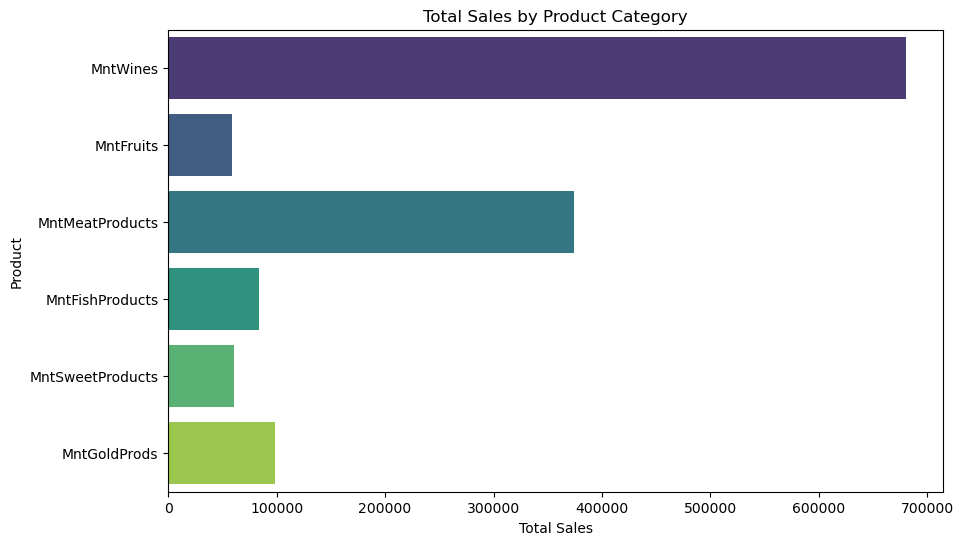

In [80]:
# putting results into a bar chart

plt.figure(figsize=(10, 6))
sns.barplot(x='TotalSales', y='Product', data=product_sums_df, palette='viridis')
plt.title('Total Sales by Product Category')
plt.xlabel('Total Sales')
plt.ylabel('Product')
plt.show()


CONCLUSION: Wine is by far the best selling product, with meat products coming in second. Fruits are the worst selling product, followed by sweet products.

b) Examine if there is a correlation between customers' age and the acceptance rate of the last campaign.

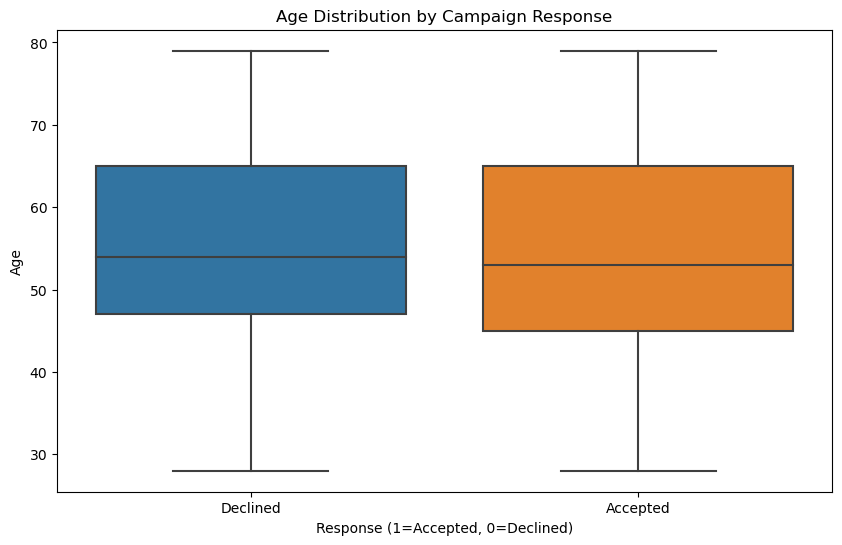

In [84]:
# examining correlation using a box plot 

plt.figure(figsize=(10, 6))
sns.boxplot(x='Response', y='Age', data=df)
plt.title('Age Distribution by Campaign Response')
plt.xlabel('Response (1=Accepted, 0=Declined)')
plt.ylabel('Age')
plt.xticks([0, 1], ['Declined', 'Accepted']) 
plt.show()


CONCLUSION: There is hardly no correlation between Age and acceptance rate of the last campaign. It appears more people in general accepted the campaign than declined it. The age of people who accepted it appears to be more varied, with a few younger people accepting the campaign. As a result, the median age of people who accepted the campaign is slightly lower than the median age of people who declined the campaign. 

c) Determine the country with the highest number of customers who accepted the last campaign.

In [86]:
# previously converted 'Country' to nominal values with one-hot encoding, so have to calculate results this way

accepted_per_country = {
    'AUS': (df['Country_AUS'] * df['Response']).sum(),
    'CA': (df['Country_CA'] * df['Response']).sum(),
    'GER': (df['Country_GER'] * df['Response']).sum(),
    'IND': (df['Country_IND'] * df['Response']).sum(),
    'ME': (df['Country_ME'] * df['Response']).sum(),
    'SA': (df['Country_SA'] * df['Response']).sum(),
    'SP': (df['Country_SP'] * df['Response']).sum(),
    'US': (df['Country_US'] * df['Response']).sum()
}

accepted_per_country

{'AUS': 23,
 'CA': 38,
 'GER': 17,
 'IND': 13,
 'ME': 2,
 'SA': 52,
 'SP': 176,
 'US': 13}

In [87]:
# convert to new dataframe for easy plotting

country_acceptance_df = pd.DataFrame(list(accepted_per_country.items()), columns=['Country', 'Accepted'])


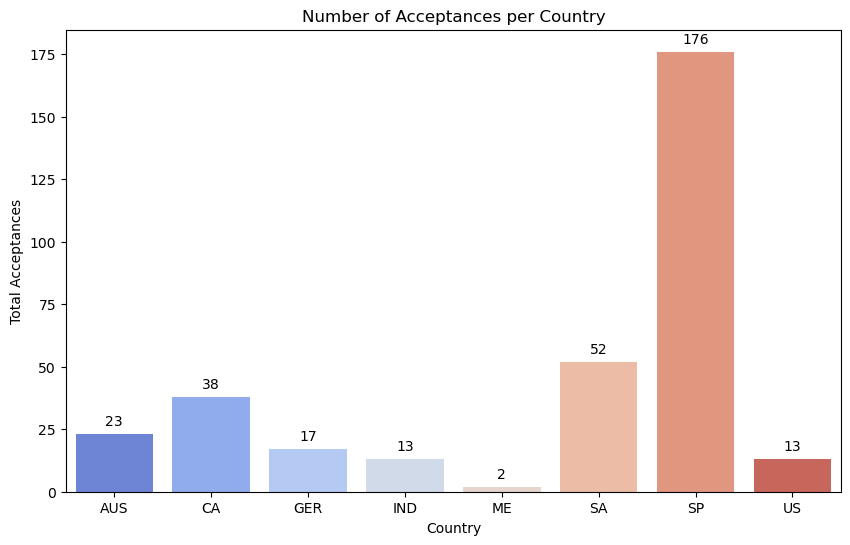

In [88]:
# visualizing using a bar plot

plt.figure(figsize=(10, 6))
barplot = sns.barplot(x='Country', y='Accepted', data=country_acceptance_df, palette='coolwarm')
plt.title('Number of Acceptances per Country')
plt.xlabel('Country')
plt.ylabel('Total Acceptances')

# Adding labels on top of each bar to better understand data
for p in barplot.patches:
    barplot.annotate(format(p.get_height(), '.0f'), 
                     (p.get_x() + p.get_width() / 2., p.get_height()), 
                     ha = 'center', va = 'center', 
                     xytext = (0, 9), 
                     textcoords = 'offset points')

plt.show()

CONCLUSION: SP was the country with the most accepted campaigns by a long shot. SA accepted a lot as well, with CA close behind. ME, US, and IND had very low acceptance.

d) Investigate if there is a discernible pattern in the number of children at home and the total expenditure.

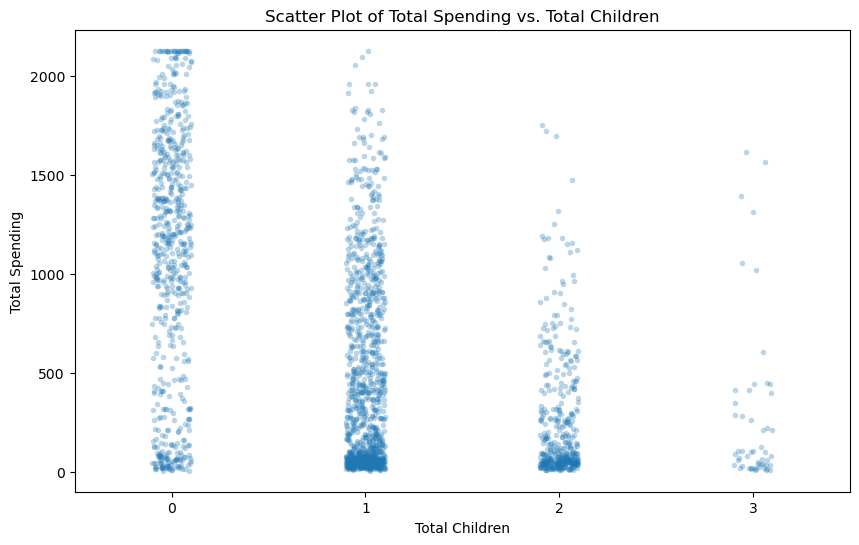

In [107]:
# using a scatter plot with stripplot and jitter to help make it easier to analyze since we have so many data points clustered in the same area

plt.figure(figsize=(10, 6))
# Using stripplot to add jitter
sns.stripplot(x='Total_Children', y='Total_Spending', data=df, jitter=True, alpha=0.3, size=4)
plt.title('Scatter Plot of Total Spending vs. Total Children')
plt.xlabel('Total Children')
plt.ylabel('Total Spending')
plt.show()


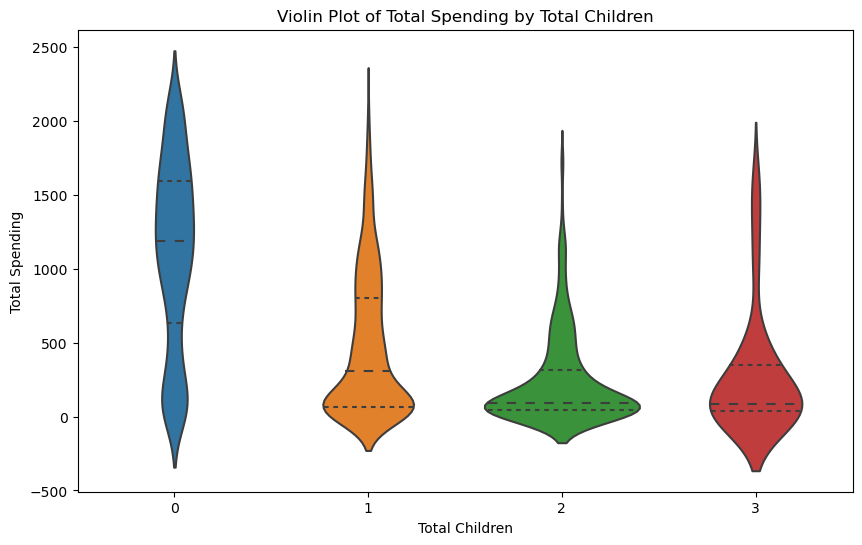

In [108]:
# since the data is so cluttered in the scatter plot I also plotted a Violen Plot to get a better sense of the relationship between children and spending

plt.figure(figsize=(10, 6))
sns.violinplot(x='Total_Children', y='Total_Spending', data=df, inner='quartile')
plt.title('Violin Plot of Total Spending by Total Children')
plt.xlabel('Total Children')
plt.ylabel('Total Spending')
plt.show()


CONCLUSION: Based on both of the charts above, the relationship is that the fewer children a customer has, the more they will spend. This might be counterintuitive, but by this point it seems like we are analyzing data from a wine/liquor store. So parents with 0 children appear to be less likely to purchase wine than parents with 3 children. The average spend of a customer with 0 children is substantially higher than a customer with 2 or 3 customers.

e) Analyze the educational background of customers who lodged complaints in the last two years.

In [117]:
# filtering data to only find complaints

complaints_df = df[df['Complain'] == 1].copy()


In [118]:
# mapping the ordinal values of education back to their corresponding labels

education_mapping = {0: 'Basic', 1: '2n Cycle', 2: 'Graduation', 3: 'Master', 4: 'PhD'}

complaints_df.loc[:, 'Education_Labels'] = complaints_df['Education'].map(education_mapping)


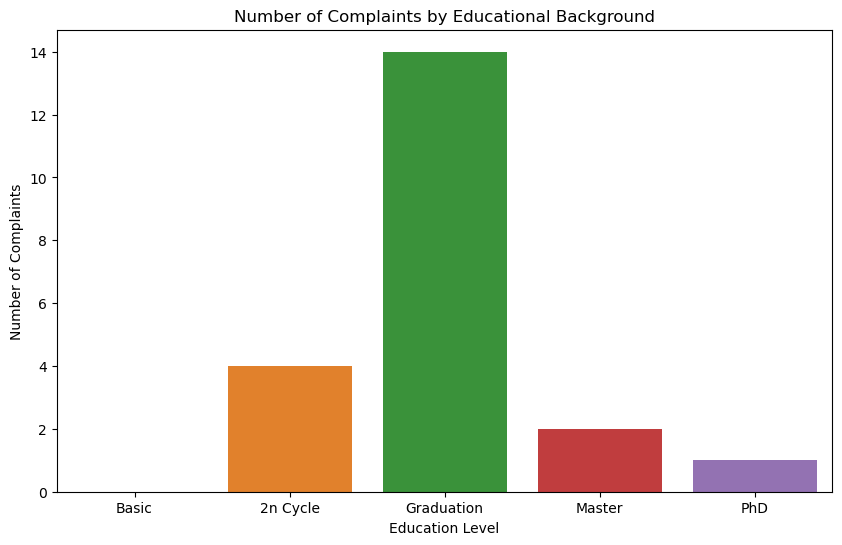

In [119]:
# plotting the results with a bar chart

plt.figure(figsize=(10, 6))
sns.countplot(x='Education_Labels', data=complaints_df, order=['Basic', '2n Cycle', 'Graduation', 'Master', 'PhD'])
plt.title('Number of Complaints by Educational Background')
plt.xlabel('Education Level')
plt.ylabel('Number of Complaints')
plt.show()


CONCLUSION: Graduate level customers have complained the most in the last two years, with 14 complaints. All other education levels have very few complaints, with Basic education level having 0 complaints.